Project notebook


In [1]:

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json


In [3]:
csvpath_09_21 = os.path.join("..","Kelly", "crime_09_21_final.csv")
# csvpath20_new = os.path.join("..","Kelly_crime_data","csv_files","COBRA-2020(NEW RMS 9-30 12-31).csv")
# csvpath20_old = os.path.join("..","Kelly_crime_data","csv_files","COBRA-2020-OldRMS-09292020.csv")
# csvpath21 = os.path.join("..","Kelly_crime_data","csv_files","COBRA-2021.csv")

In [55]:
crime_09_21_df = pd.read_csv(csvpath_09_21, encoding="utf-8", low_memory=False)
crime_09_21_df

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,timestamp,occur_year,occur_month
0,61681984,6/17/2009,1400,375 AUBURN AVE,LARCENY-NON VEHICLE,2308,Browns Mill Park,33.681430,-84.396690,6/17/2009,2009,6
1,72692336,2/24/2010,2329,600 MARTIN ST,AGG ASSAULT,1315K,Pittsburgh,33.722120,-84.394600,2/24/2010,2010,2
2,81830088,1/25/2010,830,400 FLETCHER ST SW,HOMICIDE,911,Pittsburgh,33.725540,-84.401070,1/25/2010,2010,1
3,90010061,1/1/2009,10,501 TUFTON TRL SE,BURGLARY-RESIDENCE,2202,Glenrose Heights,33.664770,-84.384300,1/1/2009,2009,1
4,90010159,1/1/2009,57,BUCKEAD AVE/GRANDVIEW AVE,ROBBERY-PEDESTRIAN,1204,Buckhead Village,33.837520,-84.375740,1/1/2009,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...
345875,210280231,1/27/2021,21:15,2343 CAMPBELLTON RD SW,LARCENY-FROM VEHICLE,23F,Southwest,33.704558,-84.465379,1/27/2021,2021,1
345876,210280239,1/28/2021,2:37,485 LINDBERGH PL NE,AGG ASSAULT,13A,Lindbergh/Morosgo,33.820101,-84.371098,1/28/2021,2021,1
345877,210280257,1/28/2021,3:26,3186 US-78,LARCENY-FROM VEHICLE,23F,Collier Heights,33.785756,-84.491515,1/28/2021,2021,1
345878,210280267,1/28/2021,2:23,323 SPRING ST NW,LARCENY-FROM VEHICLE,23F,Downtown,33.763580,-84.388717,1/28/2021,2021,1


In [54]:
#Sort by offense id
offense_sort = crime_09_21_df.sort_values("offense_id", ascending = False)
offense_sort

#Note that offense IDs are repeated but this is probably across years...check into?
crime_09_21_df["offense_id"].nunique()

338633

In [56]:
offense_sort

,offense_id,occur_date,occur_time,location,UC2_Literal,ibr_code,neighborhood,lat,long,timestamp,occur_year,occur_month
345879,210919771,1/20/2021,9:49,285 WILLIAMS ST NW,LARCENY-FROM VEHICLE,23F,Downtown,33.763189,-84.390543,1/20/2021,2021,1
345878,210280267,1/28/2021,2:23,323 SPRING ST NW,LARCENY-FROM VEHICLE,23F,Downtown,33.763580,-84.388717,1/28/2021,2021,1
345877,210280257,1/28/2021,3:26,3186 US-78,LARCENY-FROM VEHICLE,23F,Collier Heights,33.785756,-84.491515,1/28/2021,2021,1
345876,210280239,1/28/2021,2:37,485 LINDBERGH PL NE,AGG ASSAULT,13A,Lindbergh/Morosgo,33.820101,-84.371098,1/28/2021,2021,1
345875,210280231,1/27/2021,21:15,2343 CAMPBELLTON RD SW,LARCENY-FROM VEHICLE,23F,Southwest,33.704558,-84.465379,1/27/2021,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,90010159,1/1/2009,57,BUCKEAD AVE/GRANDVIEW AVE,ROBBERY-PEDESTRIAN,1204,Buckhead Village,33.837520,-84.375740,1/1/2009,2009,1
3,90010061,1/1/2009,10,501 TUFTON TRL SE,BURGLARY-RESIDENCE,2202,Glenrose Heights,33.664770,-84.384300,1/1/2009,2009,1
2,81830088,1/25/2010,830,400 FLETCHER ST SW,HOMICIDE,911,Pittsburgh,33.725540,-84.401070,1/25/2010,2010,1
1,72692336,2/24/2010,2329,600 MARTIN ST,AGG ASSAULT,1315K,Pittsburgh,33.722120,-84.394600,2/24/2010,2010,2


In [14]:
#Get overall number of crimes reported per year
year_counts = crime_09_21_df["occur_year"].value_counts()
print(year_counts)

#Convert to df and add a separate index column
year_counts_df = pd.DataFrame(year_counts).reset_index()

#Rename columns
year_counts_df = year_counts_df.rename(columns={"index": "Year", "occur_year": "Reported Crimes"})
year_counts_df

2009    38025
2010    34256
2011    33427
2012    32103
2013    31305
2014    30035
2015    28931
2016    27856
2017    25452
2018    24699
2019    23926
2020    14050
2021     1815
Name: occur_year, dtype: int64


,Year,Reported Crimes
0,2009,38025
1,2010,34256
2,2011,33427
3,2012,32103
4,2013,31305
5,2014,30035
6,2015,28931
7,2016,27856
8,2017,25452
9,2018,24699


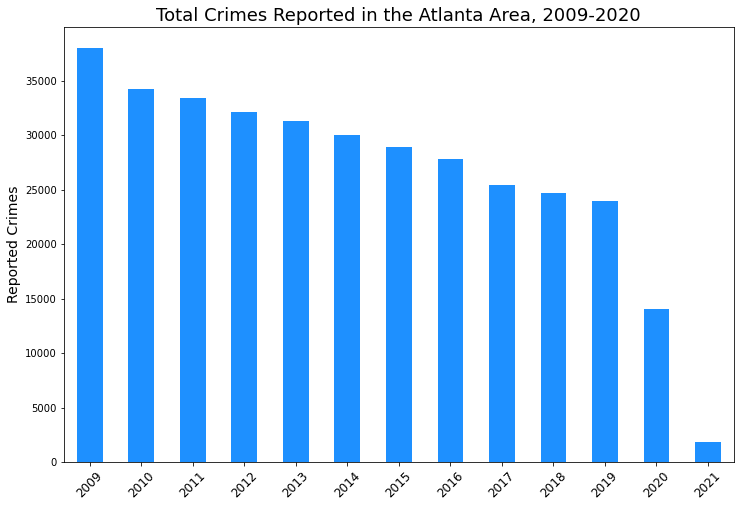

In [17]:
#Plot a bar chart of number of crimes by year
year_counts.plot(kind = "bar", color = "dodgerblue", figsize = (12,8))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area, 2009-2020", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()

    Year  Reported Crimes
9   2018            24699
10  2019            23926
11  2020            14050


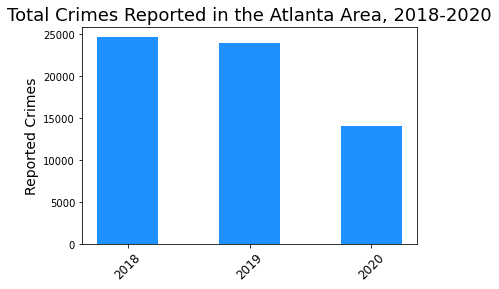

In [48]:
#Just pull 2018, 2019, 2020 for a more concentrated comparison
three_years = year_counts_df.loc[(year_counts_df["Year"]==2018) |(year_counts_df["Year"]==2019) | (year_counts_df["Year"]==2020)]
print(three_years)


#Set the chart type as bar, x-axis is the number of drug names, y is the number of treatments, set color and width of bars
plt.bar(three_years["Year"], three_years["Reported Crimes"], color = 'dodgerblue', align='center', width=0.5)

#Set placement of tick marks - just doing a pandas plot puts half year tick marks as well....
plt.xticks(three_years["Year"], rotation = 45, fontsize = (12))

#Add title and labels for each axis and set font size. Also set tick labels to sit at 45 degrees
plt.title("Total Crimes Reported in the Atlanta Area, 2018-2020", fontsize = (18))
plt.ylabel("Reported Crimes", fontsize = (14))
plt.xticks(rotation = 45, fontsize = (12))


plt.show()
